In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import fft,fftfreq

In [2]:
def moving_average(dataset,width):
    # function that takes a dataset with size 2xN
    # and returns the average of each set of
    # consecutive points with a given width
    x,y=dataset[0],dataset[1]
    avx,avy=[],[]
    pointers=[[] for i in range(max(x)+1)] # list with which y have points with a given x
    for i in range(len(x)):
        pointers[x[i]].append(y[i])
    for i in range(min(x),max(x)-width+2):
        avx.append(i+(width-1)/2) # average x position
        n=0
        for j in range(i,i+width): # counting of points in the width
            n+=len(pointers[j])
        avy.append(n)
    return avx,avy

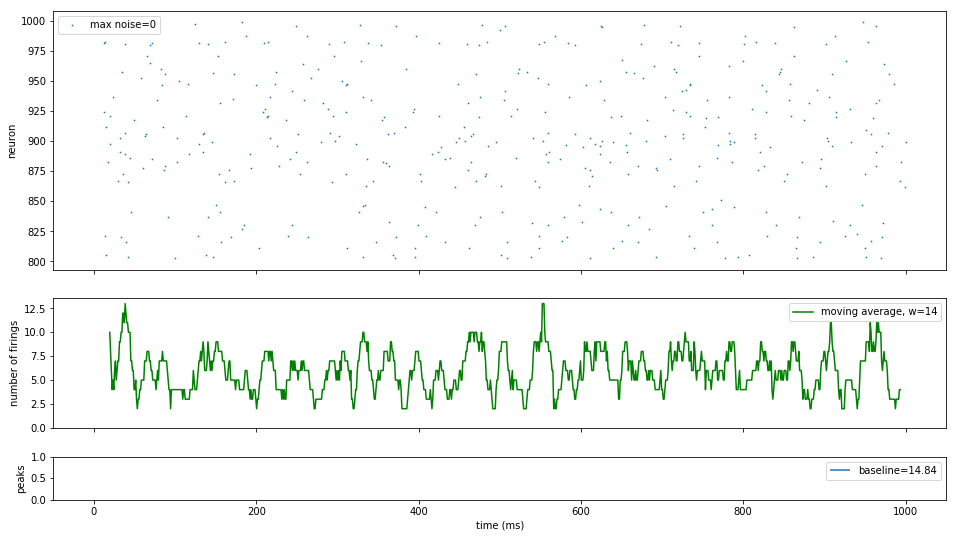

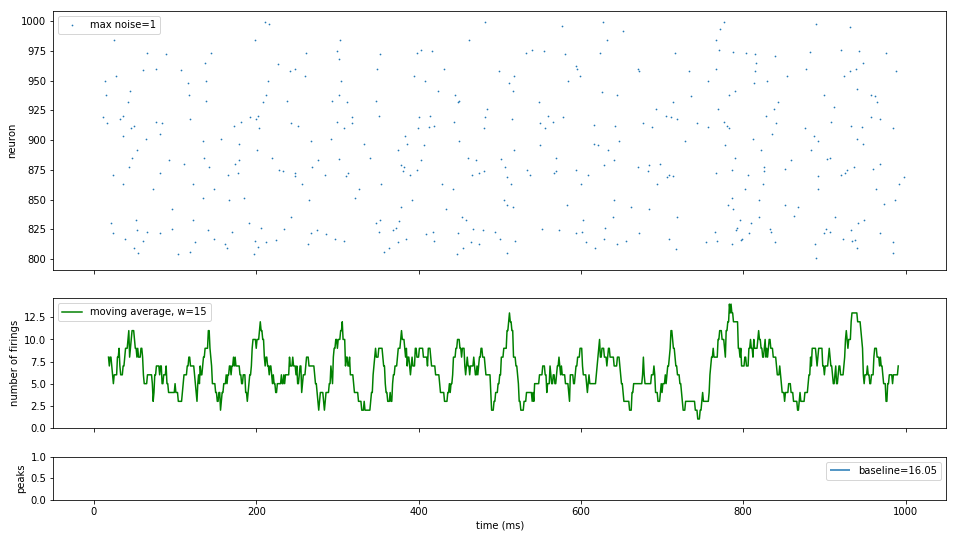

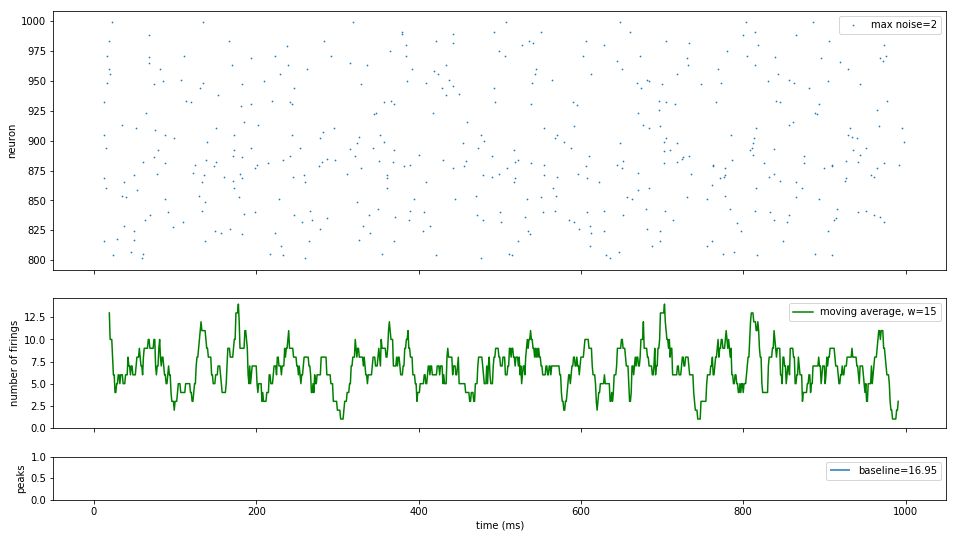

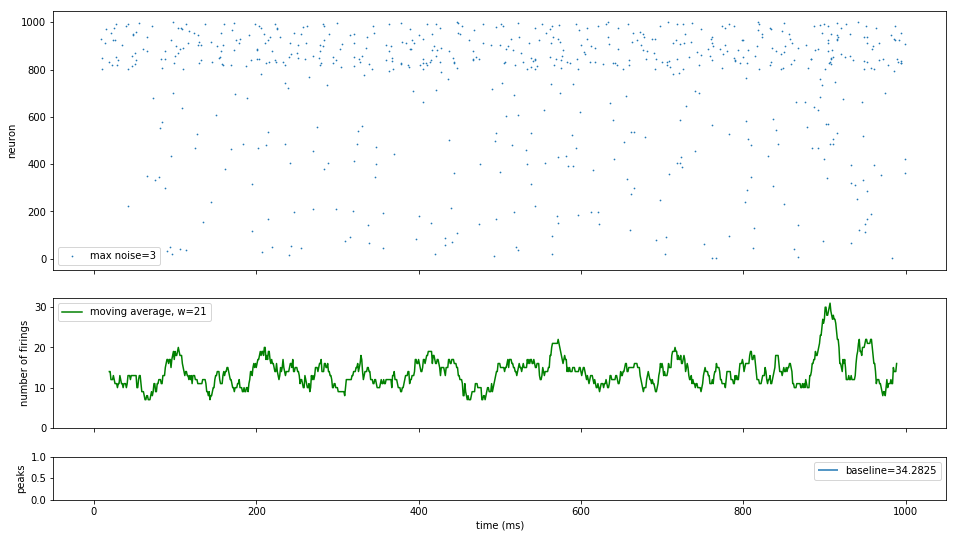

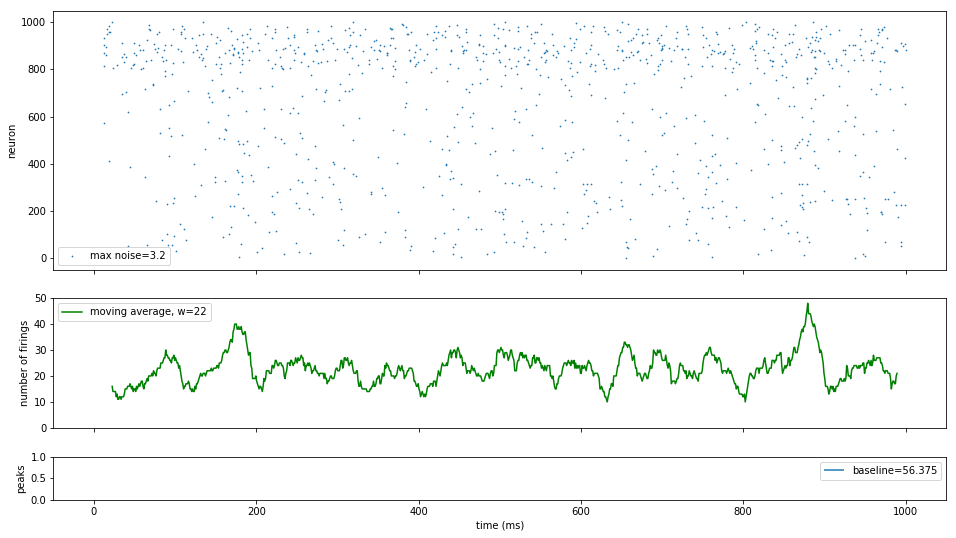

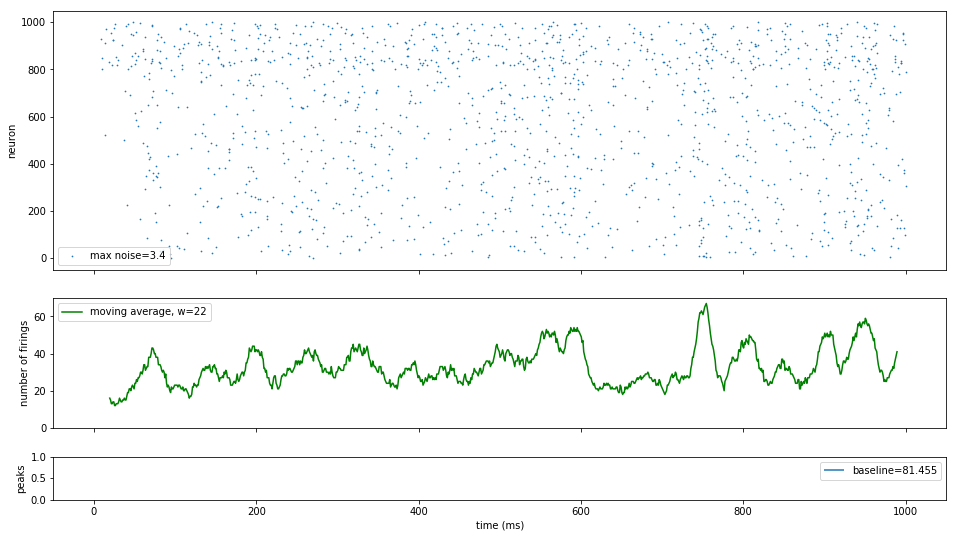

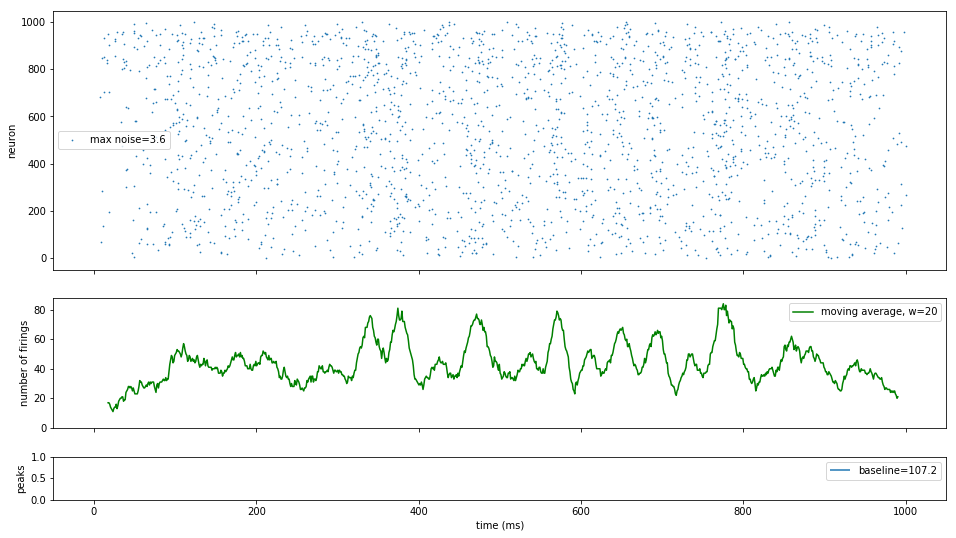

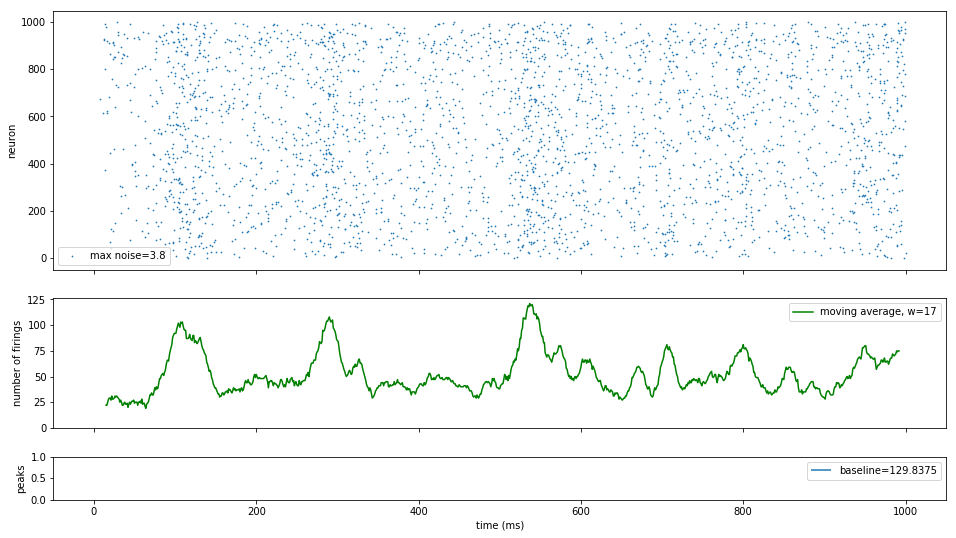

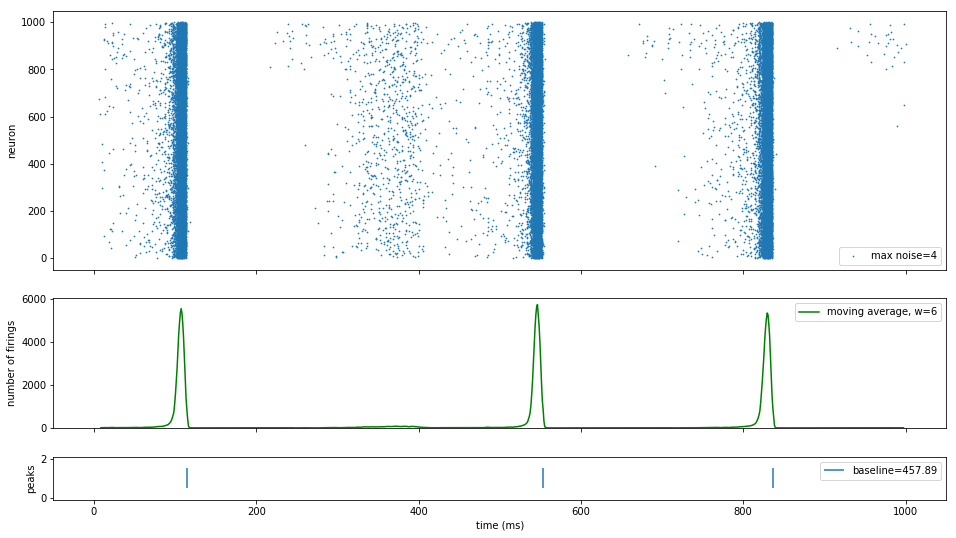

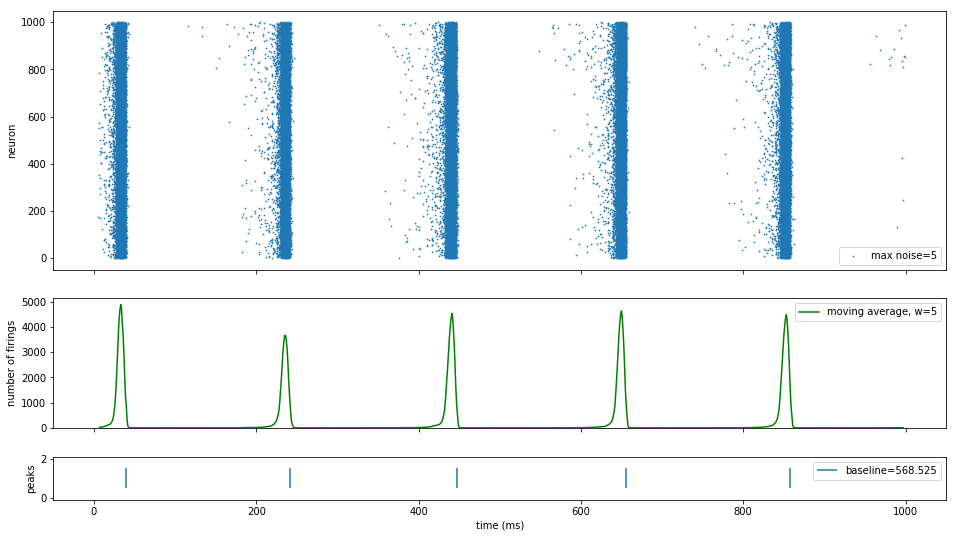

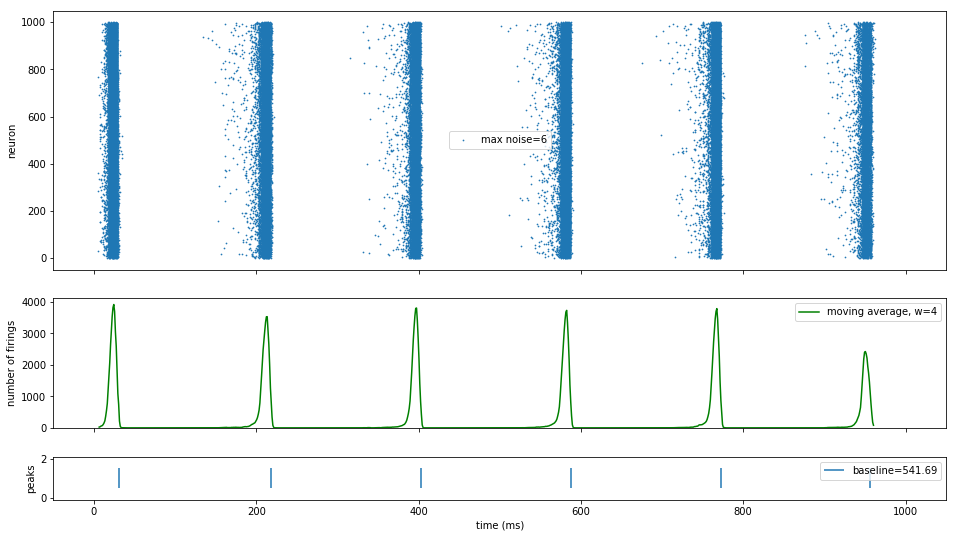

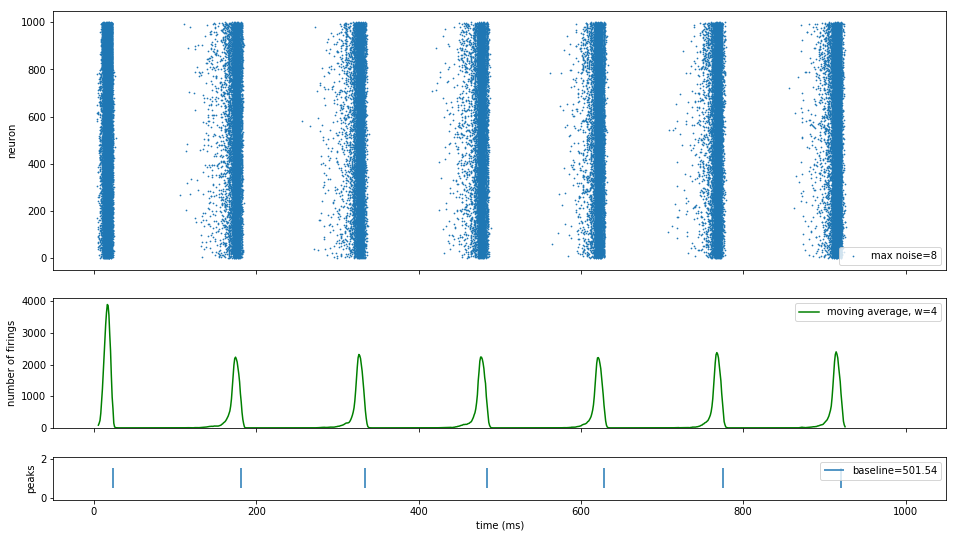

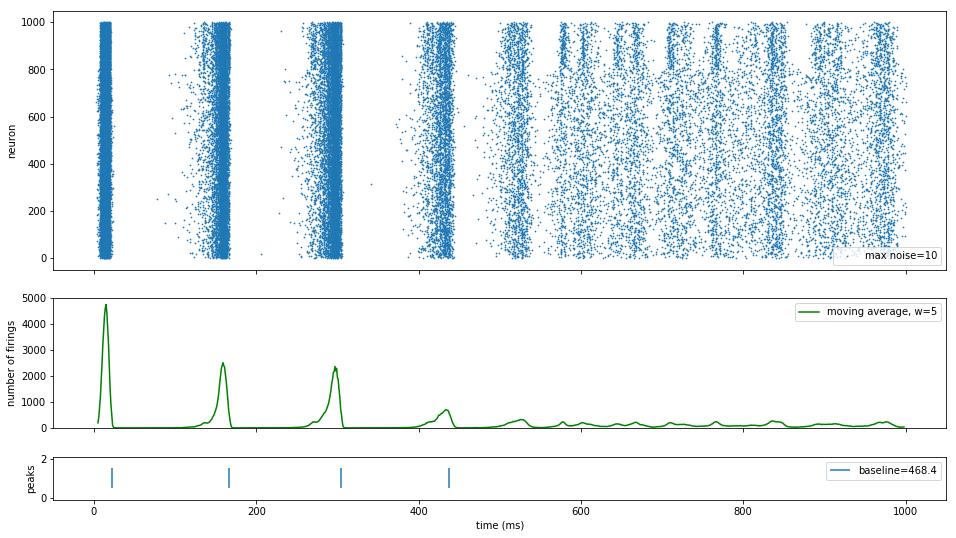

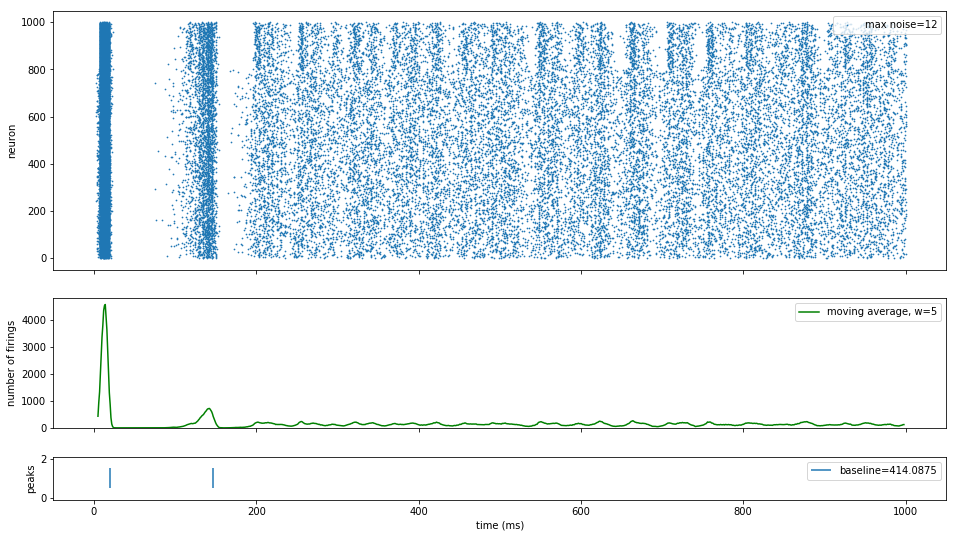

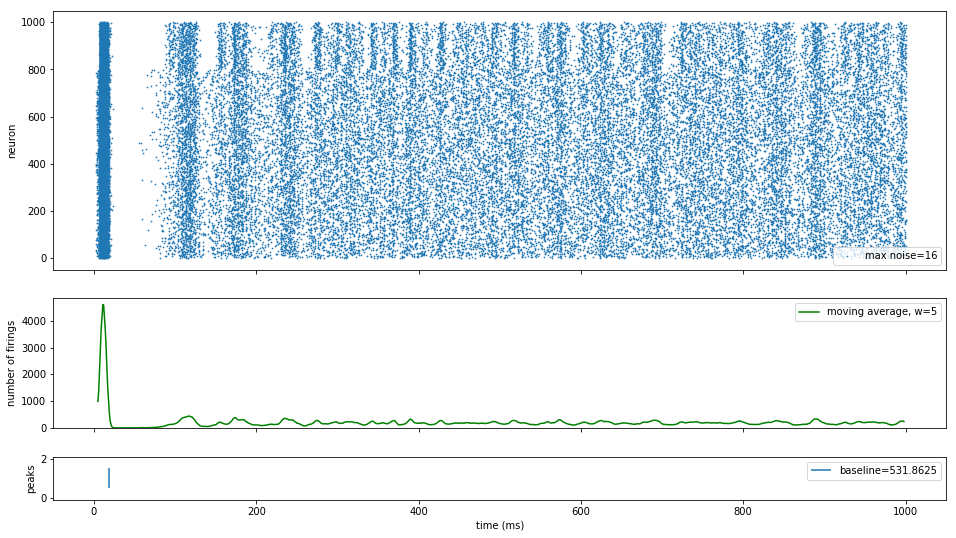

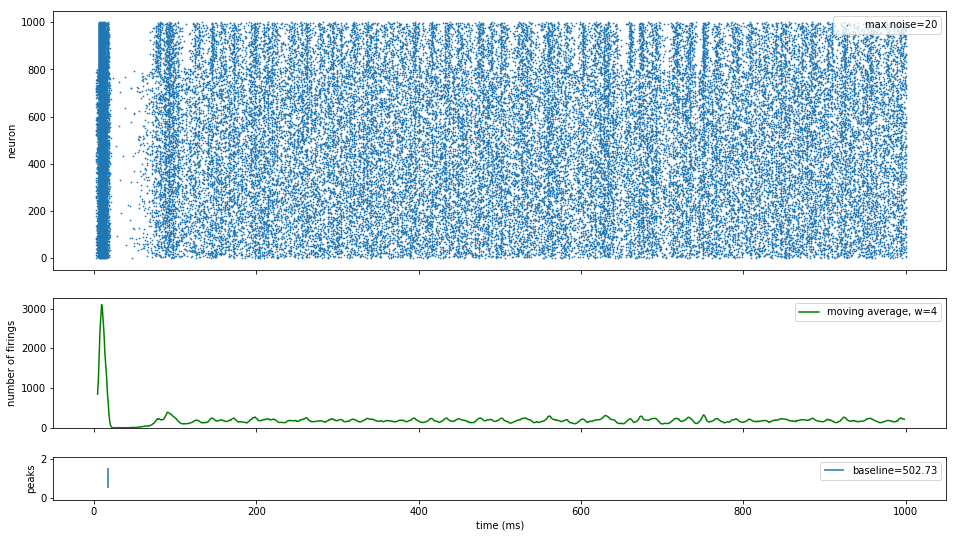

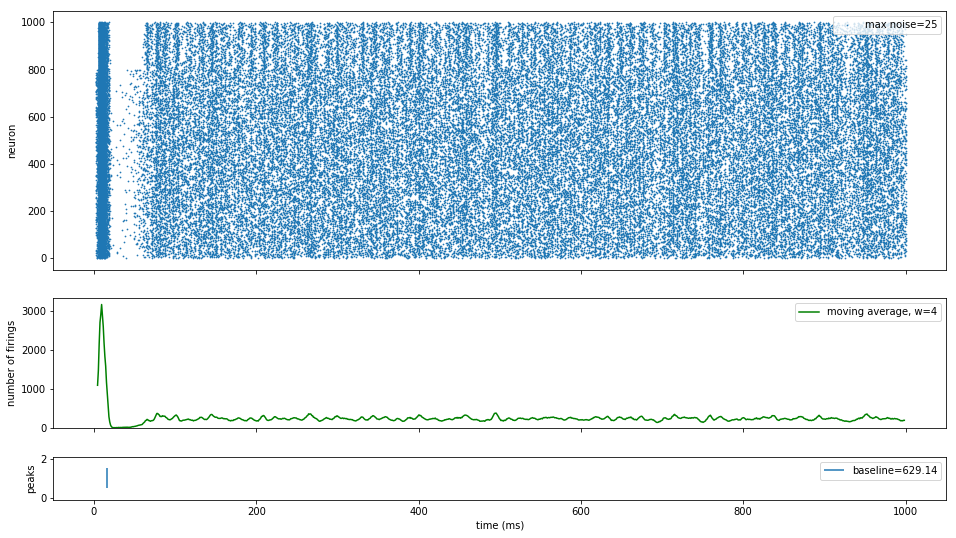

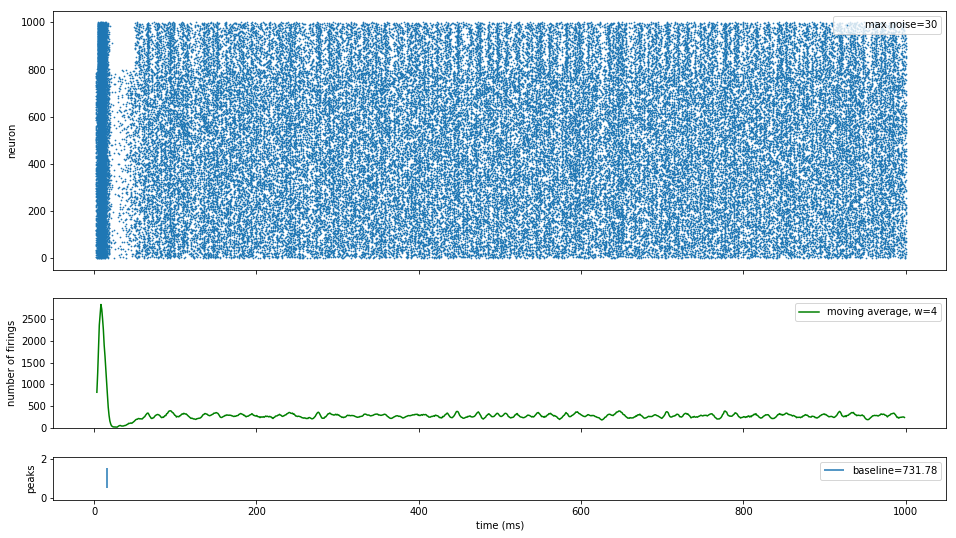

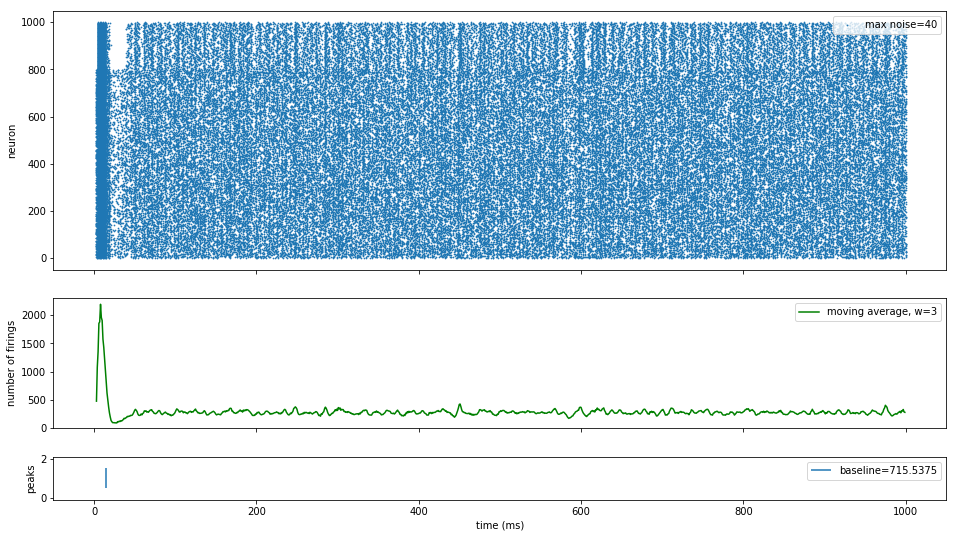

In [50]:
for i in [0,1,2,3,3.2,3.4,3.6,3.8,4,5,6,8,10,12,16,20,25,30,40]: # loop over noises, i=NOISE_MAX
    firings=pd.read_csv("MATLAB Codes/Izhikevich Matlab code/firings"+str(i)+".csv",header=None)
    fig, ax = plt.subplots(3,1,sharex=True,figsize=[16,9],gridspec_kw={'height_ratios': [6, 3, 1]})
    ax[0].scatter(firings[0],firings[1],s=0.5,label="max noise="+str(i)) # plot of firings
    ax[0].set_xlim(-50,1050)
    ax[0].set_ylabel("neuron")
    ax[0].legend()
    fireneurons=[]
    for j in range(len(firings)): # counting of how many neurons did fire
        if (firings[1][j] not in fireneurons):
            fireneurons.append(firings[1][j])
    timescale=int(round(np.sqrt(1000*len(fireneurons)/len(firings)))) # (I don't know what is the best value to choose)
        # (I derived that value from the sqrt of characteristic area of one point if it were equaliy distributed along the plot)
    avx,avy=moving_average(firings,timescale) # plot of the moving average
    ax[1].plot(avx,avy,"g-",label="moving average, w="+str(timescale))
    ax[1].set_xlim(-50,1050)
    ax[1].set_ylim(bottom=0)
    ax[1].set_ylabel("number of firings")
    ax[1].legend()
    baseline=2.5*timescale*len(firings)/1000 # reference for identifying peaks, the constant in front is like a tolerance and can be modified
    peaks=[]
    for i in range(1,len(avy)): # searching of peaks
        if (avy[i]>=baseline and avy[i]>localmax):
            localmax=avx[i]
        if (avy[i-1]>=baseline and avy[i]<baseline):
            peaks.append(localmax)
            localmax=0
    ax[2].eventplot(peaks,label="baseline="+str(baseline)) # plot of peaks
    ax[2].set_xlim(-50,1050)
    ax[2].set_xlabel("time (ms)")
    ax[2].set_ylabel("peaks")
    ax[2].legend()